In [3]:
#Declare dependencies
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
from states import us_state_abbrev

In [6]:
##Read GeoJSON data into geopandas dataframe
usa = gpd.read_file('us_states_geo.json')
# Read total medicare discharges by state into a dataframe
medbystatedf = pd.read_csv('totalmedicarebystate.csv',header=None,names=['State','Sum of Medicare Payments($)'])
# Iterate over rows in geoDF to replace state name's with abbrev's
# this will make the dataframe compatible with the Medicare data
for row, index in usa.iterrows():
    #Drop Puerto Rico from the geodataframe as we have no medicare data for it
    if index['NAME'] == 'Puerto Rico':
        usa.drop(labels=row,axis=0,inplace=True)
    else:
        usa.replace(to_replace=index['NAME'],value=us_state_abbrev[index['NAME']],inplace=True)
# Merge geoDF and medicareDF on the State Name column
usa['NAME'] = usa['NAME'].astype(str)
medbystatedf['State'] = medbystatedf['State'].astype(str)
#for row, index in medbystatedf.iterrows():
    #print(index)
medbystate_wgeo_df = usa.merge(right=medbystatedf,how='outer',left_on='NAME',right_on='State')
medbystate_wgeo_df.drop(columns=['GEO_ID','STATE','State','LSAD','CENSUSAREA'],inplace=True)
medbystate_wgeo_df.rename(columns={'NAME':'State'},inplace=True)
#for row, index in medbystate_wgeo_df.iterrows():
    #print(index['State'],index['Sum of Medicare Payments($)'])

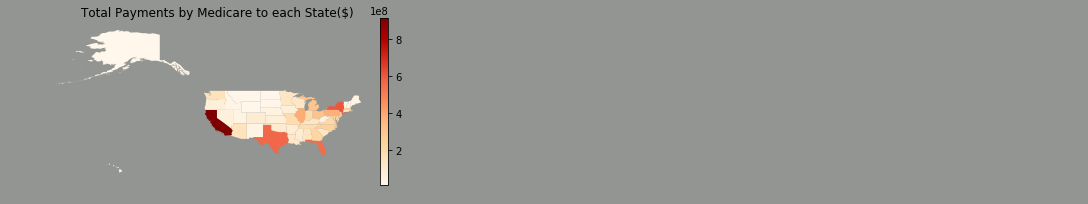

In [7]:
### Graph the Medicare Payments to each State in Sum and GeoHeatMap ###
#Create plot of GeoMap data and format axes to be tight around US map
ax = medbystate_wgeo_df.plot(cmap='OrRd',column='Sum of Medicare Payments($)')
ax.set_xlim(xmax=-60,xmin=-180)
#Add in continuous color bar
from matplotlib.colors import Normalize
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
norm = Normalize(vmin=medbystate_wgeo_df['Sum of Medicare Payments($)'].min(), vmax=medbystate_wgeo_df['Sum of Medicare Payments($)'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='OrRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap,fraction=0.025, pad=0)
ax.set_title('Total Payments by Medicare to each State($)')
ax.set_axis_off()
ax.get_figure().set_facecolor('xkcd:grey')
plt.savefig('Output',dpi=1000)
plt.show()

In [ ]:
### Graph the Number of DRG's in Each State? ###
#Create plot of GeoMap data and format axes to be tight around US map
ax = medbystate_wgeo_df.plot(cmap='OrRd',column='Sum of Medicare Payments($)')
ax.set_xlim(xmax=-60,xmin=-180)
#Add in continuous color bar
from matplotlib.colors import Normalize
from matplotlib import cm
from mpl_toolkits.axes_grid1 import make_axes_locatable
norm = Normalize(vmin=medbystate_wgeo_df['Sum of Medicare Payments($)'].min(), vmax=medbystate_wgeo_df['Sum of Medicare Payments($)'].max())
n_cmap = cm.ScalarMappable(norm=norm, cmap='OrRd')
n_cmap.set_array([])
ax.get_figure().colorbar(n_cmap,fraction=0.025, pad=0)
ax.set_title('Total Payments by Medicare to each State($)')
ax.set_axis_off()
ax.get_figure().set_facecolor('xkcd:grey')
plt.savefig('Output',dpi=1000)
plt.show()